# 状態空間表現

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RIPES-ACROSS/Control-System-Design-and-Application/blob/master/StateSpace/state_space.ipynb)

## 制御モジュールのインストール

- https://python-control.readthedocs.io/en/0.9.0/index.html

In [1]:
!pip install control

## モジュールの読込み

In [2]:
from pylab import *
import control.matlab as matlab
import matplotlib.pyplot as plt
%matplotlib inline

## 係数を定義する

In [3]:
TIME_MAX = 100

m = 250.0           # 質量
k = 40.0            # バネ係数
b = 60.0            # 減衰係数

## 状態空間(ABCD)表現を用いてシステムを定義する

In [4]:
A = [[0, 1.], [-k/m, -b/m]]
B = [[0], [1/m]]
C = [[1., 0]]
D = [0]
sys_ss = matlab.ss(A, B, C, D)
print(sys_ss)

A = [[ 0.    1.  ]
     [-0.16 -0.24]]

B = [[0.   ]
     [0.004]]

C = [[1. 0.]]

D = [[0.]]



### 状態空間表現<->伝達関数表現

In [5]:
sys_tf = matlab.ss2tf(A, B, C, D)
sys_tf

TransferFunction(array([0.004]), array([1.  , 0.24, 0.16]))

In [6]:
sys_ss2 = matlab.tf2ss(sys_tf)
print(sys_ss2)

A = [[-0.24 -0.16]
     [ 1.    0.  ]]

B = [[1.]
     [0.]]

C = [[0.    0.004]]

D = [[0.]]



## 応答の可視化

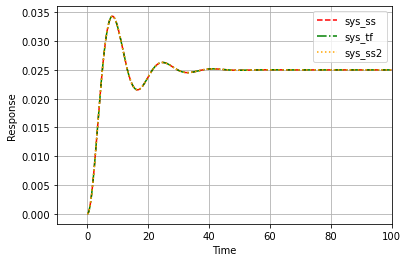

In [7]:
y_ss, trange = matlab.step(sys_ss, arange(0, TIME_MAX, 0.1))
y_tf, _ = matlab.step(sys_tf, arange(0, TIME_MAX, 0.1))
y_ss2, _ = matlab.step(sys_ss2, arange(0, TIME_MAX, 0.1))
plt.plot(trange, y_ss, '--', label='sys_ss', color='r')
plt.plot(trange, y_tf, '-.', label='sys_tf', color='g')
plt.plot(trange, y_ss2, ':', label='sys_ss2', color='orange')
plt.xlim([-10,TIME_MAX])
plt.xlabel('Time')
plt.ylabel('Response')
plt.grid()
plt.legend()
plt.show()

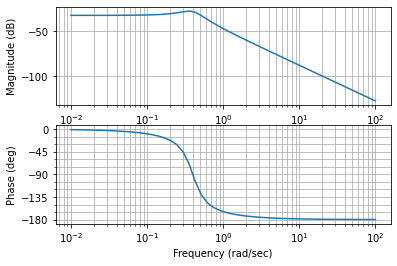

In [8]:
mag, phase, om = matlab.bode(sys_ss, 
                             logspace(-2, 2), 
                             plot=True)
plt.show()

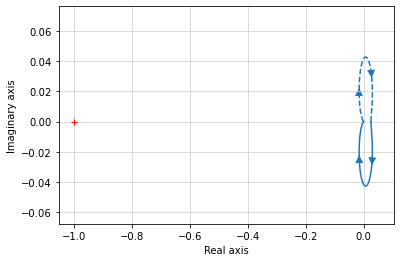

In [9]:
matlab.nyquist(sys_ss)
plt.show()

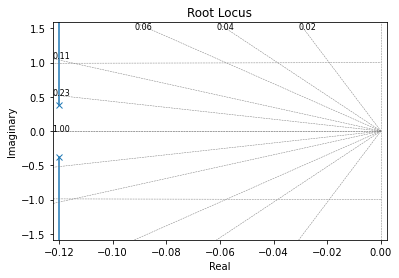

In [10]:
matlab.rlocus(sys_ss)
plt.show()